# Exercício 17

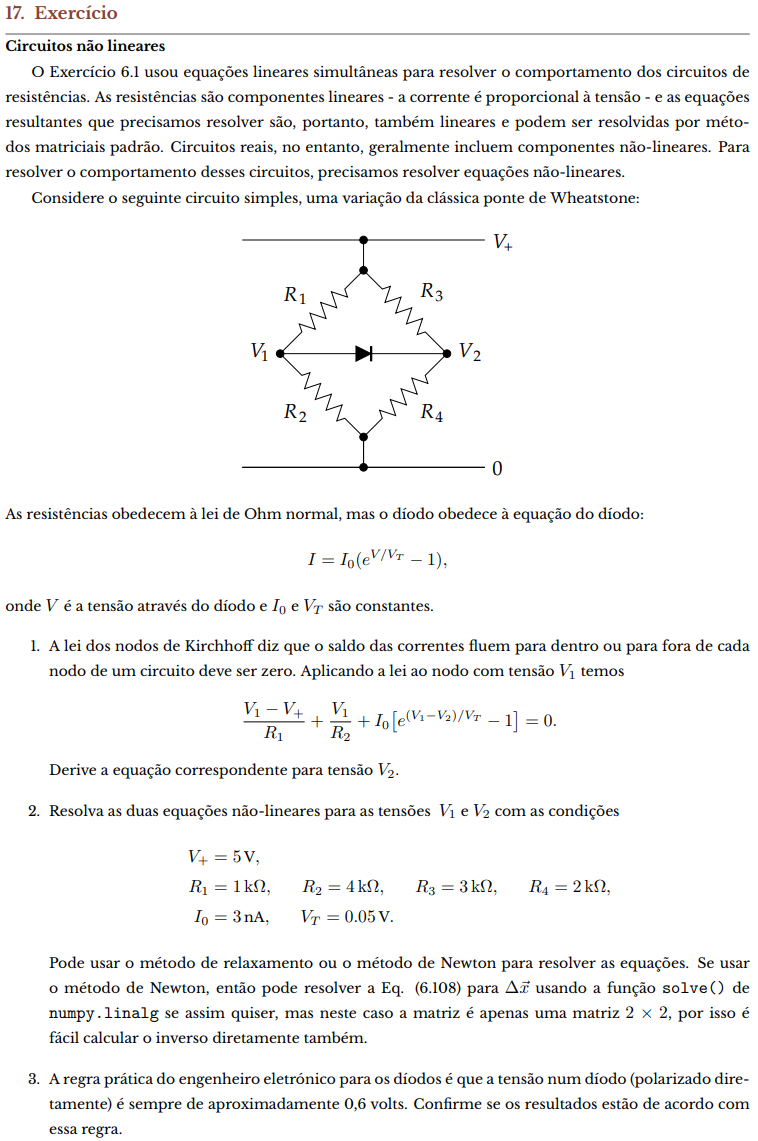

In [20]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

Para o nodo $V_2$ temos:

$$
\begin{align*}

\frac{V_2 - V_+}{R_3} + \frac{V_2}{R_4} - I_0[e^{(V_1 - V_2)/V_T} - 1] = 0

\end{align*}
$$

## Alínea 2

Começamos por reescrever as equações como:

$$
\begin{align*}

\begin{cases}
\frac{V_1 - V_+}{R_1} + \frac{V_1}{R_2} + I_0[e^{(V_1 - V_2)/V_T} - 1] = 0
\\\\

\frac{V_2 - V_+}{R_3} + \frac{V_2}{R_4} - I_0[e^{(V_1 - V_2)/V_T} - 1] = 0
\end{cases}

\end{align*}
$$

Ou seja, sendo $f(V_1, V_2)$ a função que representa o lado esquerdo deste sistema de equações temos que a matriz jacobiana de $f$ é:


$$
\begin{align*}

\mathcal J f(V_1, V_2) = \begin{pmatrix}
\frac1{R_1} + \frac1{R_2} + \frac{I_0}{V_T}e^{(V_1 - V_2) / V_T} & -\frac{I_0}{V_T}e^{(V_1 - V_2) / V_T}
\\\\

-\frac{I_0}{V_T}e^{(V_1 - V_2) / V_T} & \frac1{R_3} + \frac1{R_4} + \frac{I_0}{V_T}e^{(V_1 - V_2) / V_T}


\end{pmatrix}

\end{align*}
$$

In [21]:
# Parâmetros
VM = 5
R1 = 1000
R2 = 4000
R3 = 3000
R4 = 2000
I0 = 3e-9
VT = 0.05

# Função do sistema e respetiva jacobiana
def sist(VV: np.ndarray) -> np.ndarray:
    V1, V2 = VV[0], VV[1]
    expo = np.exp((V1 - V2)/ VT)
    return np.array([(V1 - VM) / R1 + V1 / R2 + I0 * (expo - 1), (V2 - VM) / R3 + V2 / R4 - I0 * (expo- 1)])


def jaco(VV: np.ndarray) -> np.ndarray:
    V1, V2 = VV[0], VV[1]
    expo = np.exp((V1 - V2)/ VT)

    return np.array([
        [1/R1 + 1/R2 + I0/VT * expo, -(I0 / VT) * expo],
        [-(I0 / VT) * expo, 1/R3 + 1/R4 + I0/VT * expo]
    ])


def gausselim(Ao: np.ndarray, bbo: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de N equações definido por Ao * xx = bbo usando eliminação gaussiana com pivotagem parcial.

        ### Argumentos
        Ao: Matriz N por N
        bbo: Vetor com N entradas
        
        ### Retorno
        xx: Vetor com N entradas
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    N = bb.size

    # Fazer pivotagem usando um mapa de endereços
    mm = np.arange(0, N)
    for line in range(N):
        # Posição do maior elemento da coluna (tendo em conta as trocas já feitas)
        coluna = A[mm[line:], line]
        index = list(abs(coluna)).index(max(abs(coluna))) + line

        # Trocar os elementos
        mm[line], mm[index] = mm[index], mm[line]

    # Eliminação Gaussiana
    for i in range(N-1):
        piv = A[mm[i]][i]
        for j in range(i+1, N):
            coef = A[mm[j]][i] / piv
            A[mm[j]] -= A[mm[i]] * coef
            bb[mm[j]] -= bb[mm[i]] * coef

    # Substituição Regressiva
    xx = np.zeros(N)
    xx[-1] = bb[mm[-1]] / A[mm[N-1]][N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (bb[mm[i]] - (A[mm[i]][i+1:] @ xx[i+1:])) / A[mm[i]][i]
    
    return xx


def newtonmulti(func: Callable, funcjaco: Callable, x0: np.ndarray, eps: float = 10e-6) -> float:
    """
        Resolve o sistema de equações `func(x) = 0` usando o método da Newton começando com uma estimativa `x0` e parando quando o erro for menor que `eps`.
        
        A jacobiana de func é dada por funcjaco.

        ### Retorno
        O vetor x que é solução da equação.
    """

    erro = eps + 1
    while abs(erro) > eps:
        # Determinar o passo a dar
        A = funcjaco(x0)
        bb = func(x0)

        dd = np.linalg.solve(A, bb)

        # Dar o passo
        x1 = x0 - dd
        x0 = x1

        # Ver o erro
        erro = np.linalg.norm(dd)
    
    return x0


# Resolver a equação
solV1, solV2 = newtonmulti(sist, jaco, np.array([1.5, 1]))

print(f"Obtivemos os valores V1 = {solV1:.3f}V e V2 = {solV2:.3f}V")

[3.55018185 2.67472723]
[3.53027925 2.70458113]
[3.51055378 2.73416932]
[3.49131881 2.76302178]
[3.47339087 2.7899137 ]
[3.45861149 2.81208276]
[3.44972179 2.82541731]
[3.44713193 2.8293021 ]
[3.44695538 2.82956694]
[3.44695462 2.82956807]
Obtivemos os valores V1 = 3.447V e V2 = 2.830V


## Alínea 3

De facto a diferença entre os dois valores é da ordem de $0.6V$:

In [22]:
print(abs(solV1 - solV2))

0.617386547180963
